In [36]:

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


In [37]:
df = pd.read_csv('../Social_Network_Ads.csv')

In [38]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [39]:
df = df.drop([ 'Gender'], axis=1)


<Axes: >

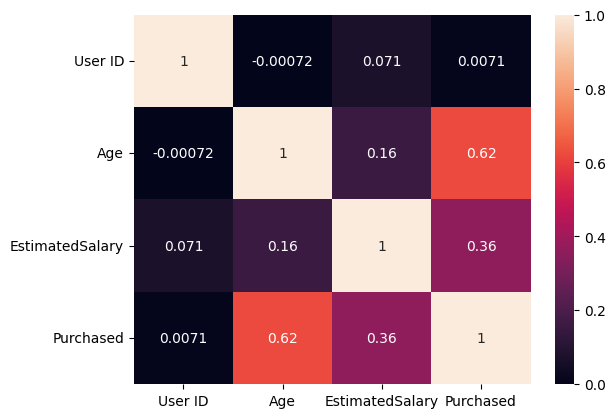

In [40]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [41]:
X = df.drop(['Purchased'], axis=1)
y = df['Purchased']


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
classifier = SVC(kernel = "linear")
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [45]:
y_pred = classifier.predict(X_test).round(1)

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [47]:
calculation = pd.DataFrame(np.c_[y_test, y_pred], columns=["Original Purchase", "Predicted Purchase Value"])
calculation


,Original Purchase,Predicted Purchase Value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


In [48]:
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))

Training Accuracy : 0.821875
Testing Accuracy : 0.9125


In [49]:


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.0875
R² Score: 0.5611285266457682


In [50]:
cm = confusion_matrix (y_test,y_pred)

In [52]:
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)